In [64]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

### 여닫이문 인식

- template matching 방법 사용

In [104]:
# 이미지 불러오기 
image = cv2.imread('./fp_000.jpg')
img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img = cv2.imread('./template.png')


# template 4개 
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
img180 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전
img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) 

# template 좌우반전 4개 
img_2 = cv2.flip(img,0)
img_2_90 = cv2.rotate(img_2, cv2.ROTATE_90_CLOCKWISE) 
img_2_180 = cv2.rotate(img_2, cv2.ROTATE_180) 
img_2_270 = cv2.rotate(img_2, cv2.ROTATE_90_COUNTERCLOCKWISE) 

imglist = [img,img90,img180,img270,img_2,img_2_90,img_2_180,img_2_270]

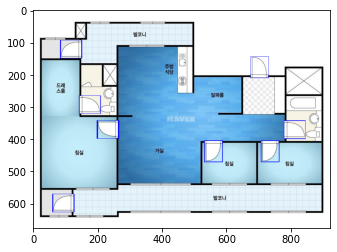

In [105]:
# template 이미제에서 탐색하기 
result_loc = []
for template in imglist  :
    result = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    result_loc.append(result)
    threshold = 0.6
    box_loc = np.where(result >= threshold) 
    w, h = template.shape[::-1]
    
    for box in zip(*box_loc[::-1]):
        startX, startY = box
        endX, endY = startX + w, startY + h
        cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 1)
    cv2.imwrite('result.png', image)
    
plt.imshow(image)


In [107]:
print(len(result_loc))

8


### 미닫이문 인식

In [386]:
# 이미지 불러오기 
image = cv2.imread('./fp_000.jpg')
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# 검은색만 추출하기 
bgrLower = np.array([0,0,0])
bgrUpper = np.array([150,150,150])
img_mask = cv2.inRange(image,bgrLower,bgrUpper)

cv2.imwrite('img_mask.png', img_mask)

True

In [387]:
# template 이미지 불러오기 
img = cv2.imread('./templatev14.png')

# template 4개 
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
img180 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전
img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) 

# template 좌우반전 4개 
img_2 = cv2.flip(img,0)
img_2_90 = cv2.rotate(img_2, cv2.ROTATE_90_CLOCKWISE) 
img_2_180 = cv2.rotate(img_2, cv2.ROTATE_180) 
img_2_270 = cv2.rotate(img_2, cv2.ROTATE_90_COUNTERCLOCKWISE) 

imglist = [img,img90,img180,img270,img_2,img_2_90,img_2_180,img_2_270]

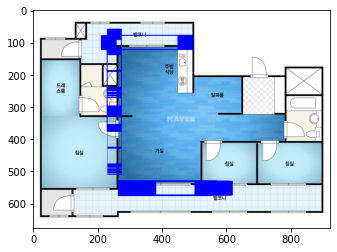

In [388]:
# template 이미제에서 탐색하기 
result_loc = []
for template in imglist  :
    result = cv2.matchTemplate(image_gray,template,cv2.TM_CCOEFF_NORMED)
    result_loc.append(result)
    threshold = 0.25
    box_loc = np.where(result >= threshold) 
    w, h = template.shape[::-1]
    
    for box in zip(*box_loc[::-1]):
        startX, startY = box
        endX, endY = startX + w, startY + h
        cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 1)
    cv2.imwrite('result.png', image)
    
plt.imshow(image)


In [ ]:
# 